<a href="https://colab.research.google.com/github/bksat90kc/KaggleChallenge/blob/main/KaggleChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install libraries
!pip install pdpbox
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython
!pip install shap
!pip install eli5

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-qrdae53i/alepython_21a688ba66fc4224bb5cc3e5b0c1437d
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-qrdae53i/alepython_21a688ba66fc4224bb5cc3e5b0c1437d
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import shap
import warnings
import plotly.express as px
import pdpbox as pdp
import eli5

from eli5.sklearn import PermutationImportance
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from pdpbox import pdp
from alepython import ale_plot
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.filterwarnings('ignore')

In [ ]:
# URL's for test and train data
train_url = 'https://raw.githubusercontent.com/bksat90kc/KaggleChallenge/main/train.csv'
test_url = 'https://raw.githubusercontent.com/bksat90kc/KaggleChallenge/main/test.csv'

**1. Loading Data**

In [ ]:
# read the train data
train_df = pd.read_csv(train_url)

In [ ]:
# display the train data
train_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [ ]:
# read the test data
test_df = pd.read_csv(test_url)

In [ ]:
# display the test data
test_df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [ ]:
# extract the cabin details
train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

# extract the cabin details
test_df[['Deck', 'CabinNum', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

**2. Exploratory Data Analysis**

<Axes: >

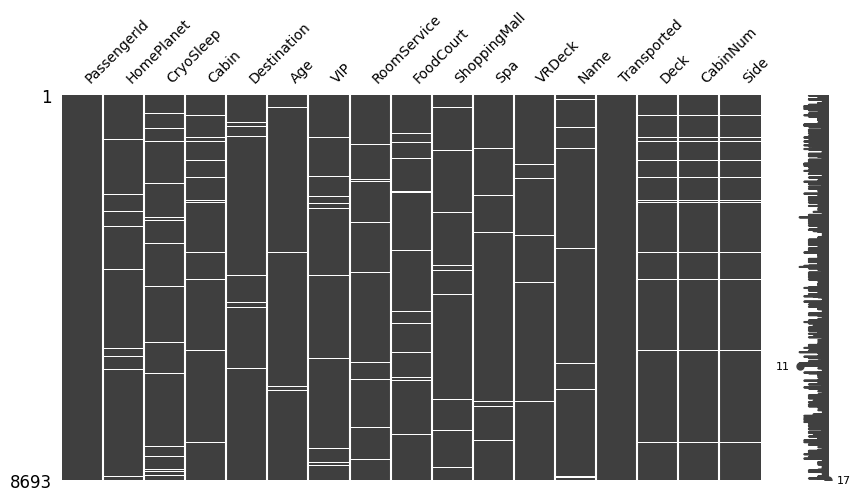

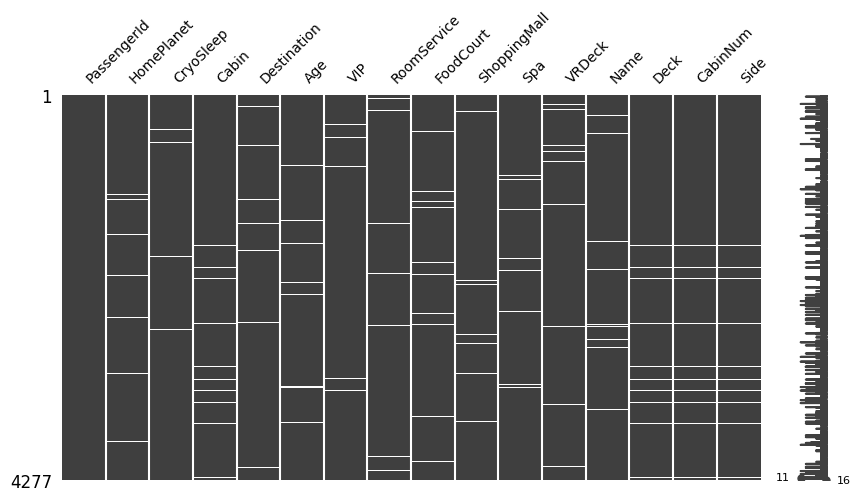

In [ ]:
# Show missing values
msno.matrix(train_df,figsize=(10,5),fontsize=10)
msno.matrix(test_df,figsize=(10,5),fontsize=10)

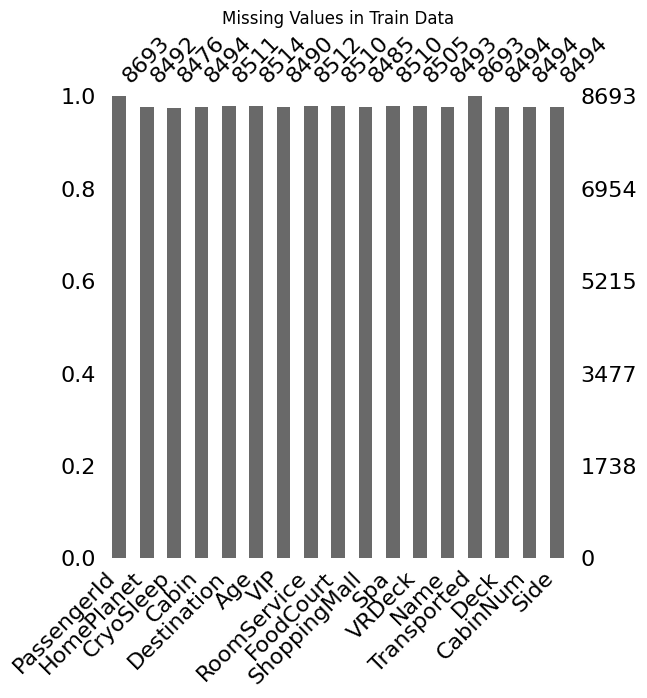

In [ ]:
# showing missing values in bar plot (training data)
msno.bar(train_df, figsize=(6, 6))
plt.title('Missing Values in Train Data')
plt.show()

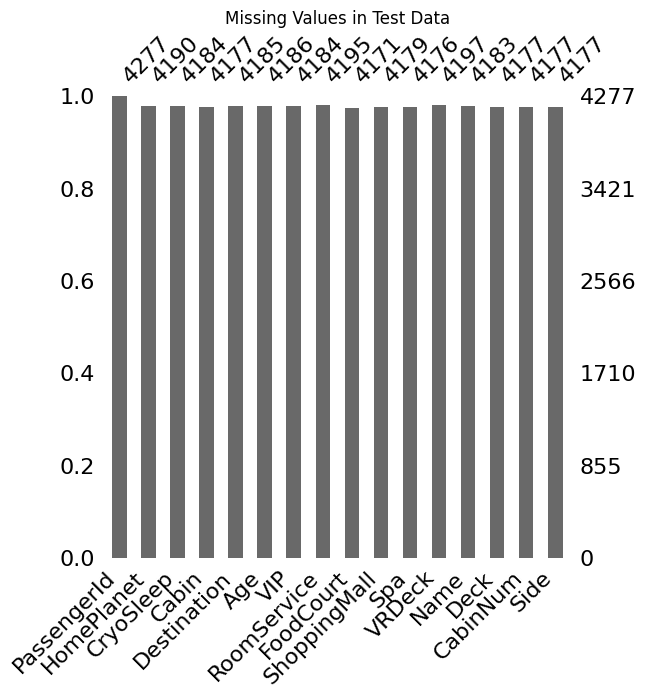

In [ ]:
# showing missing values in bar plot (test data)
msno.bar(test_df, figsize=(6, 6))
plt.title('Missing Values in Test Data')
plt.show()

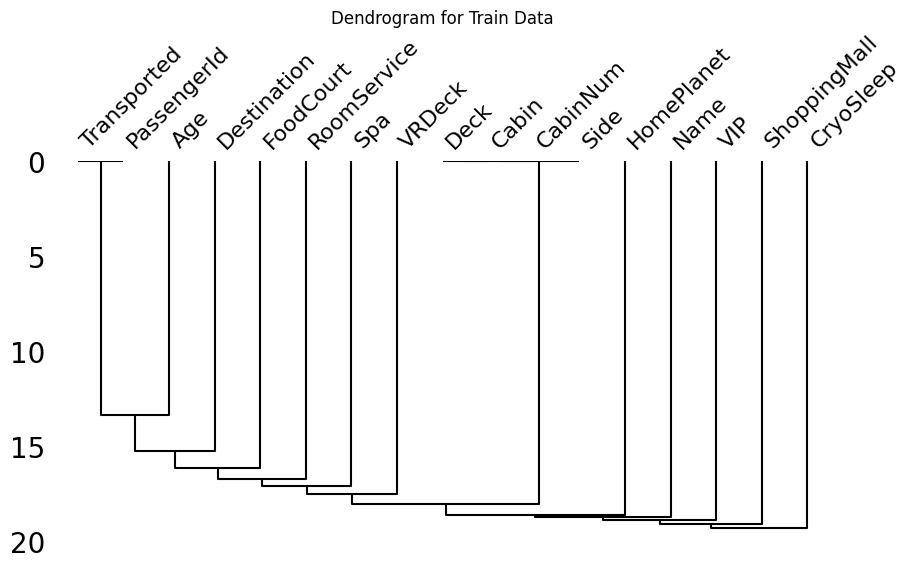

In [ ]:
# Dendrogram for training data
msno.dendrogram(train_df, figsize=(10, 5))
plt.title('Dendrogram for Train Data')
plt.show()

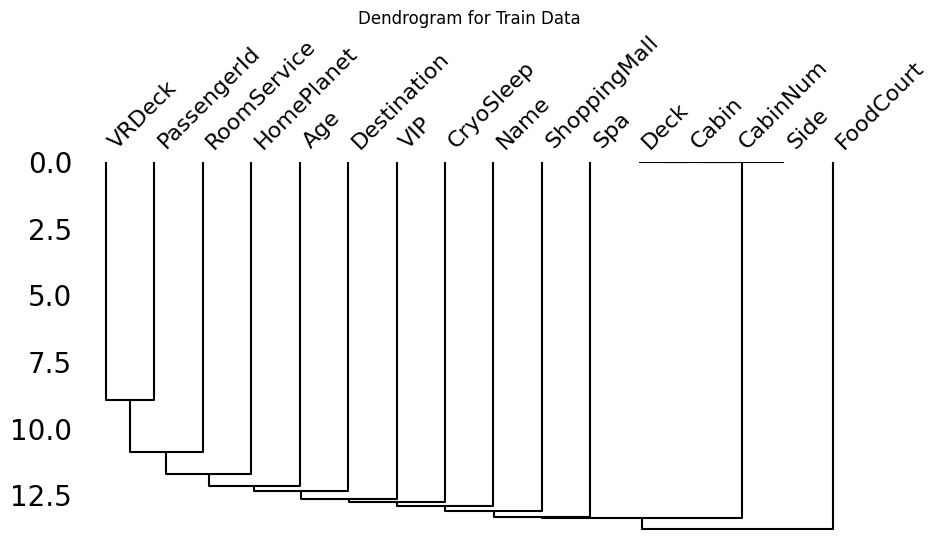

In [ ]:
# Dendrogram for test data
msno.dendrogram(test_df, figsize=(10, 5))
plt.title('Dendrogram for Train Data')
plt.show()

In [ ]:
df_hd_by_des

array([1951, 1404,  920, 2651,  839,  727])

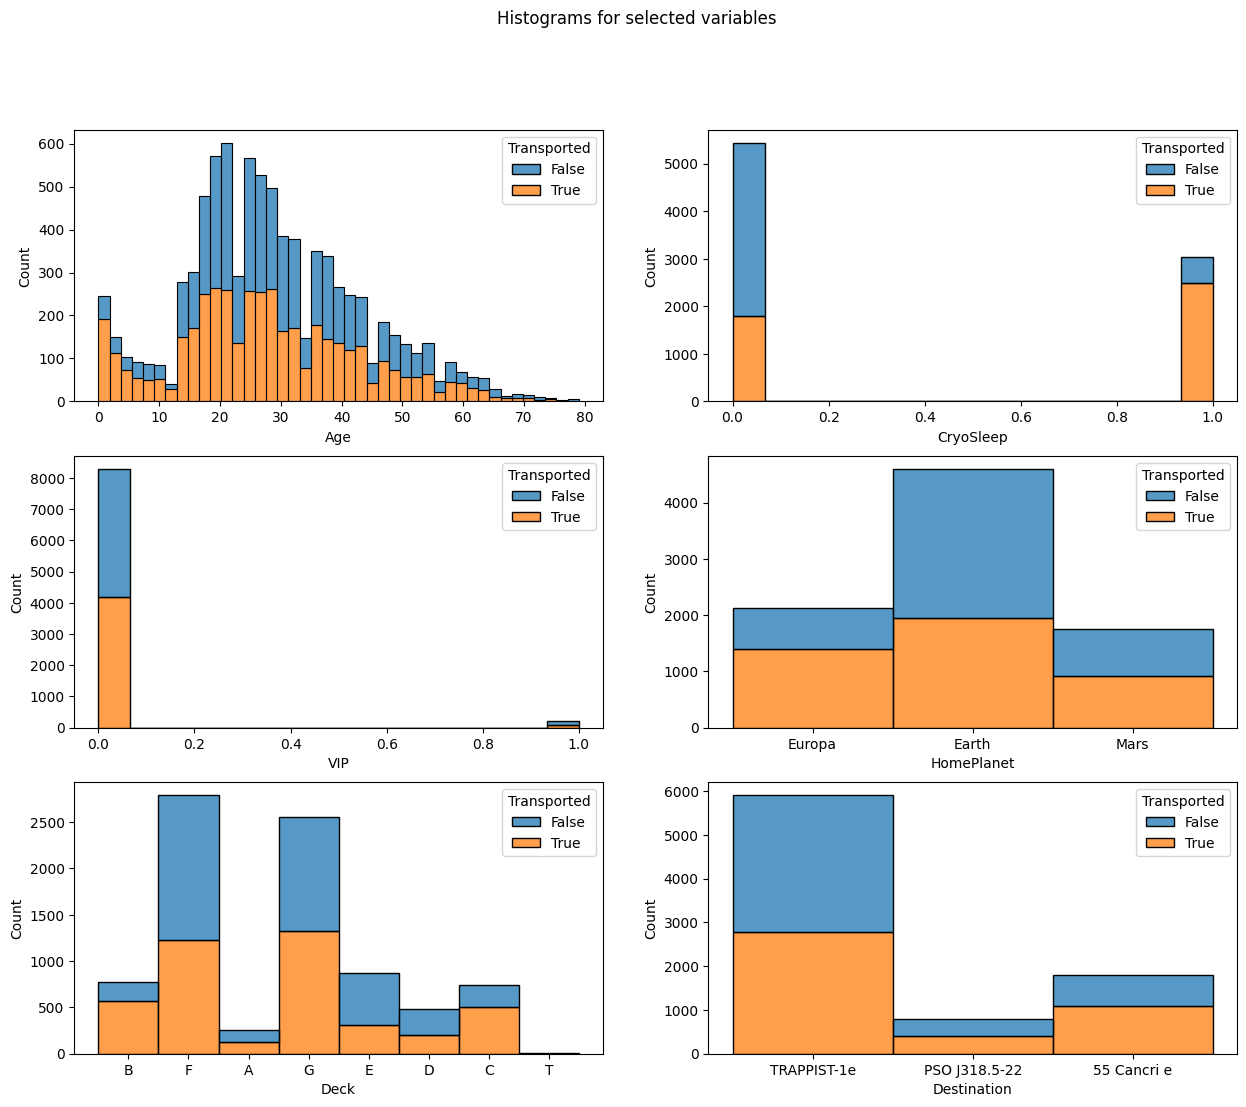

In [ ]:
# Histogram plots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

sns.histplot(x='Age', data=train_df, hue='Transported', ax=axs[0, 0], multiple="stack")
sns.histplot(x='CryoSleep', data=train_df, hue='Transported', ax=axs[0, 1], multiple="stack")
sns.histplot(x='VIP', data=train_df, hue='Transported', ax=axs[1, 0], multiple="stack")
sns.histplot(x='HomePlanet', data=train_df, hue='Transported', ax=axs[1, 1], multiple="stack")
sns.histplot(x='Deck', data=train_df, hue='Transported', ax=axs[2, 0], multiple="stack")
sns.histplot(x='Destination', data=train_df, hue='Transported', ax=axs[2, 1], multiple="stack")

axs[0, 0].set(ylabel='Count')
axs[0, 1].set(ylabel='Count')
axs[1, 0].set(ylabel='Count')
axs[1, 1].set(ylabel='Count')
axs[2, 0].set(ylabel='Count')
axs[2, 1].set(ylabel='Count')

fig.suptitle('Histograms for selected variables')
plt.show()

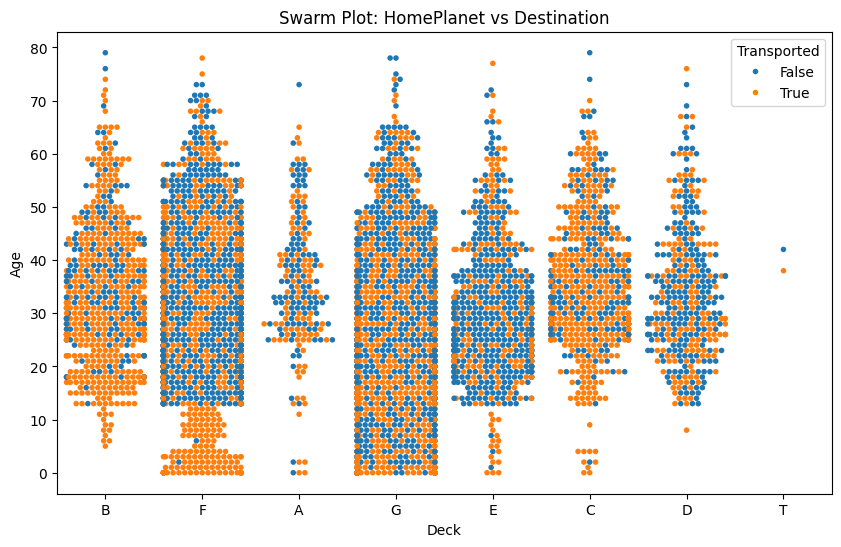

In [ ]:
# Swarm plot for HomePlanet and Destination
swarm_data = train_df.dropna()
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Deck', y='Age', hue='Transported', data=swarm_data, size=4)
plt.title('Swarm Plot: HomePlanet vs Destination')
plt.show()

In [ ]:
# Tree plot
tree_data = train_df.dropna()
fig = px.treemap(tree_data, path=['Transported', 'HomePlanet', 'Destination', 'Deck', 'CryoSleep'])
fig.show()

**3. Data Pre-Processing**

3.1 Pre-Processing Train Data

In [ ]:
# drop Cabin number
train_df.drop(['CabinNum'], axis=1, inplace=True)

In [ ]:
# dataframe information
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
 14  Deck          8494 non-null   object 
 15  Side          8494 non-null   object 
dtypes: bool(1), float64(6), object(9)
memory usage: 1.0+ MB


In [ ]:
# dataframe description
train_df.describe(include='all')

PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         8693       8492      8476     8494         8511  8514.000000   
unique        8693          3         2     6560            3          NaN   
top        0001_01      Earth     False  G/734/S  TRAPPIST-1e          NaN   
freq             1       4602      5439        8         5915          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.827930   
std            NaN        NaN       NaN      NaN          NaN    14.489021   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    27.000000   
75%            NaN        NaN       NaN      NaN          NaN    38.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall           Spa  \
count    8490   8512.000000   8510.000000   8485.000000   8510.000000   
unique      2           NaN           NaN           NaN           NaN   
top     False           NaN           NaN           NaN           NaN   
freq     8291           NaN           NaN           NaN           NaN   
mean      NaN    224.687617    458.077203    173.729169    311.138778   
std       NaN    666.717663   1611.489240    604.696458   1136.705535   
min       NaN      0.000000      0.000000      0.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      0.000000      0.000000   
75%       NaN     47.000000     76.000000     27.000000     59.000000   
max       NaN  14327.000000  29813.000000  23492.000000  22408.000000   

              VRDeck            Name Transported  Deck  Side  
count    8505.000000            8493        8693  8494  8494  
unique           NaN            8473           2     8     2  
top              NaN  Gollux Reedall        True     F     S  
freq             NaN               2        4378  2794  4288  
mean      304.854791             NaN         NaN   NaN   NaN  
std      1145.717189             NaN         NaN   NaN   NaN  
min         0.000000             NaN         NaN   NaN   NaN  
25%         0.000000             NaN         NaN   NaN   NaN  
50%         0.000000             NaN         NaN   NaN   NaN  
75%        46.000000             NaN         NaN   NaN   NaN  
max     24133.000000             NaN         NaN   NaN   NaN

In [ ]:
# replace NaN values in dataframe
values = {'HomePlanet': 'unknown', 'CryoSleep': 0, 'CabinNum': 0, 'Spa':0,
          'Destination': 'unknown', 'RoomService': 0, 'Side': 'Unknown',
          'FoodCourt': 0, 'ShoppingMall': 0,  'VRDeck': 0, 'VIP': 'False' }
train_df.fillna(value=values, inplace=True)

In [ ]:
# # label encoding for Deck
# lab_enc = LabelEncoder()
# lab_enc.fit(train_df['Deck'])
# train_df['Deck'] = lab_enc.transform(train_df['Deck'])
# train_df['Deck'].unique()

In [ ]:
# average imputation
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

In [ ]:
# one hot encoding for HomePlanet, Destination, Deck, and Side
oh1 = OneHotEncoder()
oh1.fit(train_df[['HomePlanet', 'Destination', 'Deck', 'Side']])

OneHotEncoder()

In [ ]:
# categories in HomePlanet
oh1.categories_

[array(['Earth', 'Europa', 'Mars', 'unknown'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'unknown'],
       dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', 'Unknown'], dtype=object)]

In [ ]:
# transform the one hot encoder object for train data
oh_train = oh1.transform(train_df[['HomePlanet', 'Destination',
                                   'Deck', 'Side']]).toarray()

In [ ]:
# shape of the output
print('Shape of one-hot encoded HomePlanet data:', oh_train.shape)

Shape of one-hot encoded HomePlanet data: (8693, 20)


In [ ]:
oh_train

array([[0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [ ]:
# new transformed data for the HomePlanet
oh_train_df = pd.DataFrame(oh_train, columns=['Earth', 'Europa', 'Mars',
                                              'UnSrc','55 Cancri e',
                                              'PSO J318.5-22', 'TRAPPIST-1e',
                                              'UnDes', 'Deck_A', 'Deck_B',
                                              'Deck_C', 'Deck_D', 'Deck_E',
                                              'Deck_F', 'Deck_G', 'Deck_T',
                                              'Deck_Unk', 'Side_P',
                                              'Side_S', 'Side_Unk'])
oh_train_df.head()

Earth  Europa  Mars  UnSrc  55 Cancri e  PSO J318.5-22  TRAPPIST-1e  UnDes  \
0    0.0     1.0   0.0    0.0          0.0            0.0          1.0    0.0   
1    1.0     0.0   0.0    0.0          0.0            0.0          1.0    0.0   
2    0.0     1.0   0.0    0.0          0.0            0.0          1.0    0.0   
3    0.0     1.0   0.0    0.0          0.0            0.0          1.0    0.0   
4    1.0     0.0   0.0    0.0          0.0            0.0          1.0    0.0   

   Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_Unk  \
0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0       0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0       0.0   
2     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       0.0   
3     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0       0.0   
4     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0       0.0   

   Side_P  Side_S  Side_Unk  
0     1.0     0.0       0.0  
1     0.0     1.0       0.0  
2     0.0     1.0       0.0  
3     0.0     1.0       0.0  
4     0.0     1.0       0.0

In [ ]:
# concatenating two dataframes
train_df = pd.concat([train_df, oh_train_df], axis=1, join='inner')

In [ ]:
# convert Transported column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["Transported"] == False, "Transported"] = 0
train_df.loc[train_df["Transported"] == True, "Transported"] = 1

# convert VIP column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["VIP"] == False, "VIP"] = 0
train_df.loc[train_df["VIP"] == 'False', "VIP"] = 0
train_df.loc[train_df["VIP"] == True, "VIP"] = 1

# convert CryoSleep column to numeric values : 0 for False and 1 for True
train_df.loc[train_df["CryoSleep"] == False, "CryoSleep"] = 0
train_df.loc[train_df["CryoSleep"] == 'False', "CryoSleep"] = 0
train_df.loc[train_df["CryoSleep"] == True, "CryoSleep"] = 1

In [ ]:
# convert the data type to integer
columns = ['CryoSleep', 'Transported', 'VIP', 'Earth', 'Europa', 'Mars',
           'UnSrc', '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UnDes',
           'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F',
           'Deck_G', 'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk']

for col in columns:
  train_df[col] = train_df[col].astype('int64')

In [ ]:
# Change the index to PassengerId
train_df.index = train_df['PassengerId']

In [ ]:
# drop the columns that are not required for the classfication
train_df.drop(['HomePlanet', 'Destination', 'Cabin',
               'PassengerId', 'Deck', 'Side', 'Name'], axis=1, inplace=True)

In [ ]:
# extract required train data
X_train = train_df.drop('Transported', axis=1)
y_train = train_df[['Transported']]

In [ ]:
X_train.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall  \
PassengerId                                                               
0001_01              0  39.0    0          0.0        0.0           0.0   
0002_01              0  24.0    0        109.0        9.0          25.0   
0003_01              0  58.0    1         43.0     3576.0           0.0   
0003_02              0  33.0    0          0.0     1283.0         371.0   
0004_01              0  16.0    0        303.0       70.0         151.0   

                Spa  VRDeck  Earth  Europa  ...  Deck_C  Deck_D  Deck_E  \
PassengerId                                 ...                           
0001_01         0.0     0.0      0       1  ...       0       0       0   
0002_01       549.0    44.0      1       0  ...       0       0       0   
0003_01      6715.0    49.0      0       1  ...       0       0       0   
0003_02      3329.0   193.0      0       1  ...       0       0       0   
0004_01       565.0     2.0      1       0  ...       0       0       0   

             Deck_F  Deck_G  Deck_T  Deck_Unk  Side_P  Side_S  Side_Unk  
PassengerId                                                              
0001_01           0       0       0         0       1       0         0  
0002_01           1       0       0         0       0       1         0  
0003_01           0       0       0         0       0       1         0  
0003_02           0       0       0         0       0       1         0  
0004_01           1       0       0         0       0       1         0  

[5 rows x 28 columns]

In [ ]:
# check for NaN in all columns in a dataframe
def nancolumns(df):
  columns = df.columns
  for col in columns:
    check_nan = df[col].isnull().values.any()
    print(col, check_nan)

In [ ]:
# check for NaN in all columns for train data
nancolumns(X_train)

CryoSleep False
Age False
VIP False
RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
Earth False
Europa False
Mars False
UnSrc False
55 Cancri e False
PSO J318.5-22 False
TRAPPIST-1e False
UnDes False
Deck_A False
Deck_B False
Deck_C False
Deck_D False
Deck_E False
Deck_F False
Deck_G False
Deck_T False
Deck_Unk False
Side_P False
Side_S False
Side_Unk False


3.2 Pre-Processing Test Data

In [ ]:
# drop cabin number for the test data
test_df.drop(['CabinNum'], axis=1, inplace=True)

In [ ]:
# dataframe information
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
 13  Deck          4177 non-null   object 
 14  Side          4177 non-null   object 
dtypes: float64(6), object(9)
memory usage: 501.3+ KB


In [ ]:
# dataframe description
test_df.describe(include='all')

PassengerId HomePlanet CryoSleep    Cabin  Destination          Age  \
count         4277       4190      4184     4177         4185  4186.000000   
unique        4277          3         2     3265            3          NaN   
top        0013_01      Earth     False  G/160/P  TRAPPIST-1e          NaN   
freq             1       2263      2640        8         2956          NaN   
mean           NaN        NaN       NaN      NaN          NaN    28.658146   
std            NaN        NaN       NaN      NaN          NaN    14.179072   
min            NaN        NaN       NaN      NaN          NaN     0.000000   
25%            NaN        NaN       NaN      NaN          NaN    19.000000   
50%            NaN        NaN       NaN      NaN          NaN    26.000000   
75%            NaN        NaN       NaN      NaN          NaN    37.000000   
max            NaN        NaN       NaN      NaN          NaN    79.000000   

          VIP   RoomService     FoodCourt  ShoppingMall           Spa  \
count    4184   4195.000000   4171.000000   4179.000000   4176.000000   
unique      2           NaN           NaN           NaN           NaN   
top     False           NaN           NaN           NaN           NaN   
freq     4110           NaN           NaN           NaN           NaN   
mean      NaN    219.266269    439.484296    177.295525    303.052443   
std       NaN    607.011289   1527.663045    560.821123   1117.186015   
min       NaN      0.000000      0.000000      0.000000      0.000000   
25%       NaN      0.000000      0.000000      0.000000      0.000000   
50%       NaN      0.000000      0.000000      0.000000      0.000000   
75%       NaN     53.000000     78.000000     33.000000     50.000000   
max       NaN  11567.000000  25273.000000   8292.000000  19844.000000   

              VRDeck        Name  Deck  Side  
count    4197.000000        4183  4177  4177  
unique           NaN        4176     8     2  
top              NaN  Cints Erle     F     S  
freq             NaN           2  1445  2093  
mean      310.710031         NaN   NaN   NaN  
std      1246.994742         NaN   NaN   NaN  
min         0.000000         NaN   NaN   NaN  
25%         0.000000         NaN   NaN   NaN  
50%         0.000000         NaN   NaN   NaN  
75%        36.000000         NaN   NaN   NaN  
max     22272.000000         NaN   NaN   NaN

In [ ]:
# replace NaN values in dataframe
values = {'HomePlanet': 'unknown', 'CryoSleep': 0, 'Spa':0,
          'Destination': 'unknown', 'VIP': 'False', 'RoomService': 0,
          'FoodCourt': 0, 'ShoppingMall': 0,  'VRDeck': 0, 'Side': 'unknown'}
test_df.fillna(value=values, inplace=True)

In [ ]:
# # label encoding for Deck
# test_df['Deck'] = lab_enc.transform(test_df['Deck'])
# test_df['Deck'].unique()

In [ ]:
# average imputation
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)

In [ ]:
# one hot encoding for test data
oh2 = OneHotEncoder()
oh2.fit(test_df[['HomePlanet', 'Destination', 'Deck', 'Side']])

OneHotEncoder()

In [ ]:
# categories in HomePlanet
oh2.categories_

[array(['Earth', 'Europa', 'Mars', 'unknown'], dtype=object),
 array(['55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'unknown'],
       dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', nan], dtype=object),
 array(['P', 'S', 'unknown'], dtype=object)]

In [ ]:
# transform the one hot encoder object for train data
oh_test = oh2.transform(test_df[['HomePlanet', 'Destination',
                                   'Deck', 'Side']]).toarray()

In [ ]:
# shape of the output
print('Shape of one-hot encoded HomePlanet data:', oh_test.shape)

Shape of one-hot encoded HomePlanet data: (4277, 20)


In [ ]:
oh_test

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:
# new transformed test data
oh_test_df = pd.DataFrame(oh_test, columns=['Earth', 'Europa', 'Mars', 'UnSrc',
                                            '55 Cancri e', 'PSO J318.5-22',
                                            'TRAPPIST-1e', 'UnDes', 'Deck_A',
                                            'Deck_B', 'Deck_C', 'Deck_D',
                                            'Deck_E', 'Deck_F', 'Deck_G',
                                            'Deck_T', 'Deck_Unk', 'Side_P',
                                            'Side_S', 'Side_Unk'])
oh_test_df.head()

Earth  Europa  Mars  UnSrc  55 Cancri e  PSO J318.5-22  TRAPPIST-1e  UnDes  \
0    1.0     0.0   0.0    0.0          0.0            0.0          1.0    0.0   
1    1.0     0.0   0.0    0.0          0.0            0.0          1.0    0.0   
2    0.0     1.0   0.0    0.0          1.0            0.0          0.0    0.0   
3    0.0     1.0   0.0    0.0          0.0            0.0          1.0    0.0   
4    1.0     0.0   0.0    0.0          0.0            0.0          1.0    0.0   

   Deck_A  Deck_B  Deck_C  Deck_D  Deck_E  Deck_F  Deck_G  Deck_T  Deck_Unk  \
0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0       0.0   
1     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0       0.0   
2     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0       0.0   
3     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0       0.0   
4     0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0       0.0   

   Side_P  Side_S  Side_Unk  
0     0.0     1.0       0.0  
1     0.0     1.0       0.0  
2     0.0     1.0       0.0  
3     0.0     1.0       0.0  
4     0.0     1.0       0.0

In [ ]:
# concatenating two dataframes
test_df = pd.concat([test_df, oh_test_df], axis=1, join='inner')

In [ ]:
# convert VIP column to numeric values : 0 for False and 1 for True
test_df.loc[test_df["VIP"] == False, "VIP"] = 0
test_df.loc[test_df["VIP"] == 'False', "VIP"] = 0
test_df.loc[test_df["VIP"] == True, "VIP"] = 1

# convert CryoSleep column to numeric values : 0 for False and 1 for True
test_df.loc[test_df["CryoSleep"] == False, "CryoSleep"] = 0
test_df.loc[test_df["CryoSleep"] == 'False', "CryoSleep"] = 0
test_df.loc[test_df["CryoSleep"] == True, "CryoSleep"] = 1

In [ ]:
# convert the data type to integer
columns = ['CryoSleep', 'VIP', 'Earth', 'Europa', 'Mars', 'UnSrc',
           '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e', 'UnDes', 'Deck_A',
           'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F','Deck_G',
           'Deck_T', 'Deck_Unk', 'Side_P', 'Side_S', 'Side_Unk']

for col in columns:
  test_df[col] = test_df[col].astype('int64')


In [ ]:
# Change the index to PassengerId
test_df.index = test_df['PassengerId']

In [ ]:
# drop columns that are not required for classification
test_df.drop(['HomePlanet', 'Destination', 'Cabin',
              'PassengerId', 'Deck', 'Side', 'Name'], axis=1, inplace=True)

In [ ]:
test_df.head()

CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall  \
PassengerId                                                               
0013_01              1  27.0    0          0.0        0.0           0.0   
0018_01              0  19.0    0          0.0        9.0           0.0   
0019_01              1  31.0    0          0.0        0.0           0.0   
0021_01              0  38.0    0          0.0     6652.0           0.0   
0023_01              0  20.0    0         10.0        0.0         635.0   

                Spa  VRDeck  Earth  Europa  ...  Deck_C  Deck_D  Deck_E  \
PassengerId                                 ...                           
0013_01         0.0     0.0      1       0  ...       0       0       0   
0018_01      2823.0     0.0      1       0  ...       0       0       0   
0019_01         0.0     0.0      0       1  ...       1       0       0   
0021_01       181.0   585.0      0       1  ...       1       0       0   
0023_01         0.0     0.0      1       0  ...       0       0       0   

             Deck_F  Deck_G  Deck_T  Deck_Unk  Side_P  Side_S  Side_Unk  
PassengerId                                                              
0013_01           0       1       0         0       0       1         0  
0018_01           1       0       0         0       0       1         0  
0019_01           0       0       0         0       0       1         0  
0021_01           0       0       0         0       0       1         0  
0023_01           1       0       0         0       0       1         0  

[5 rows x 28 columns]

In [ ]:
# check for NaN in all columns for test data
nancolumns(test_df)

CryoSleep False
Age False
VIP False
RoomService False
FoodCourt False
ShoppingMall False
Spa False
VRDeck False
Earth False
Europa False
Mars False
UnSrc False
55 Cancri e False
PSO J318.5-22 False
TRAPPIST-1e False
UnDes False
Deck_A False
Deck_B False
Deck_C False
Deck_D False
Deck_E False
Deck_F False
Deck_G False
Deck_T False
Deck_Unk False
Side_P False
Side_S False
Side_Unk False


3.3. Data Transformation using StandardScaler

In [ ]:
# Standard Scaler for transformation
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
test_df_scaled = scaler.transform(test_df)

**4. Modelling**

Following Classification are conducted:


1.   Logistic Regression
2.   Random Forest



In [ ]:
# logistic regression
lrcl = LogisticRegression()
lrcl.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# random forest classifier
rfcl = RandomForestClassifier()
rfcl.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
# finding predictions for each algorithm
lr_y_pred = lrcl.predict(test_df_scaled)
rf_y_pred = rfcl.predict(test_df_scaled)

In [ ]:
# reshaping the predictions
lr_y_pred = lr_y_pred.reshape(-1, 1)
rf_y_pred = rf_y_pred.reshape(-1, 1)

In [ ]:
# creating the dataframes for the predictions
lr_pred_df = pd.DataFrame(lr_y_pred, columns=['Transported'])
rf_pred_df = pd.DataFrame(rf_y_pred, columns=['Transported'])

In [ ]:
# predict the values for training data
lr_y_train_pred = lrcl.predict(X_train_scaled)
rf_y_train_pred = rfcl.predict(X_train_scaled)

**5. Performance Analysis**

In [ ]:
# performance result for logistic regression
print("Logistic Regression")
print("Accuracy Score:")
print(accuracy_score(y_train, lr_y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, lr_y_train_pred))
print("Classification report:")
print(classification_report(y_train, lr_y_train_pred))

Logistic Regression
Accuracy Score:
0.7910962843667319
Confusion Matrix:
[[3338  977]
 [ 839 3539]]
Classification report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79      4315
           1       0.78      0.81      0.80      4378

    accuracy                           0.79      8693
   macro avg       0.79      0.79      0.79      8693
weighted avg       0.79      0.79      0.79      8693



In [ ]:
# performance result for random forest
print("Random Forest")
print("Accuracy Score:")
print(accuracy_score(y_train, rf_y_train_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_train, rf_y_train_pred))
print("Classification report:")
print(classification_report(y_train, rf_y_train_pred))

Random Forest
Accuracy Score:
0.9490394570343955
Confusion Matrix:
[[4007  308]
 [ 135 4243]]
Classification report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      4315
           1       0.93      0.97      0.95      4378

    accuracy                           0.95      8693
   macro avg       0.95      0.95      0.95      8693
weighted avg       0.95      0.95      0.95      8693



**6. XAI**

In [ ]:
# features for the partial dependence plot
features = test_df.columns.tolist()

In [ ]:
# PDP for age
x_pdp = test_df.copy()
partial_plot = pdp.PDPIsolate(model=rfcl,
                              df=x_pdp,
                              model_features=features,
                              feature="Age",
                              feature_name="Age")

obtain pred_func from the provided model.


  0%|          | 0/10 [00:00<?, ?it/s]

In [ ]:
fig, axes = partial_plot.plot(center=False, plot_lines=True, plot_pts_dist=True)
fig

In [ ]:
# PDP for CryoSleep
x_pdp = test_df.copy()
partial_plot = pdp.PDPIsolate(model=rfcl,
                              df=x_pdp,
                              model_features=features,
                              feature="CryoSleep",
                              feature_name="CryoSleep")

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
fig, axes = partial_plot.plot(center=False, plot_lines=True, plot_pts_dist=True)
fig

In [ ]:
# PDP for VIP
x_pdp = test_df.copy()
partial_plot = pdp.PDPIsolate(model=rfcl,
                              df=x_pdp,
                              model_features=features,
                              feature="VIP",
                              feature_name="VIP")

obtain pred_func from the provided model.


  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
fig, axes = partial_plot.plot(center=False, plot_lines=True, plot_pts_dist=True)
fig

In [ ]:
# PDP for RoomService
x_pdp = test_df.copy()
partial_plot = pdp.PDPIsolate(model=rfcl,
                              df=x_pdp,
                              model_features=features,
                              feature="RoomService",
                              feature_name="RoomService")

obtain pred_func from the provided model.


  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
fig, axes = partial_plot.plot(center=False, plot_lines=True, plot_pts_dist=True)
fig

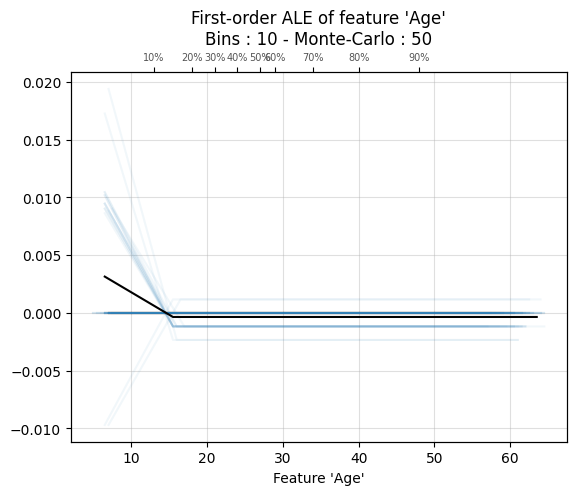

<Axes: title={'center': "First-order ALE of feature 'Age'\nBins : 10 - Monte-Carlo : 50"}, xlabel="Feature 'Age'">

In [ ]:
# ALE plot for age
x_ale = test_df.copy()
ale_plot(rfcl, x_ale, 'Age', monte_carlo="TRUE")

In [ ]:
# Shapley values
x_shap = test_df.head(500).copy()
# Compute Shapley values
explainer = shap.TreeExplainer(rfcl)
shap_values = explainer.shap_values(x_shap)

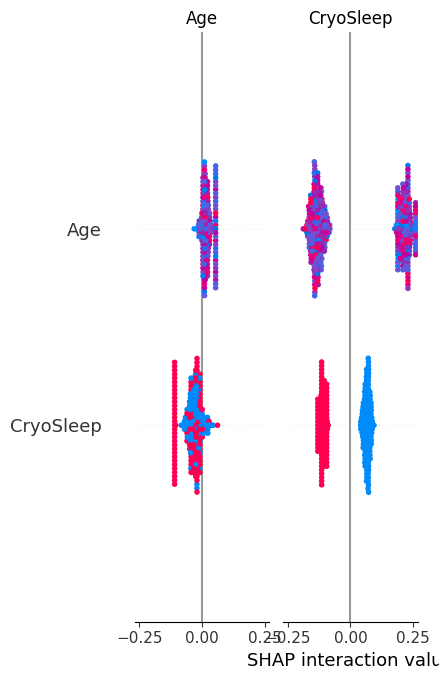

In [ ]:
shap.summary_plot(shap_values, x_shap)

In [ ]:
# Permutation Importance
perm = PermutationImportance(rfcl).fit(X_train, y_train)
eli5.show_weights(perm, feature_names=list(X_train.columns))

**7. Prepare predicitons for submission**

In [ ]:
test_df.reset_index(inplace=True)

In [ ]:
# creating the outcomes
lr_outcome_df = pd.concat([test_df[['PassengerId']], lr_pred_df], axis=1, join='inner')
rf_outcome_df = pd.concat([test_df[['PassengerId']], rf_pred_df], axis=1, join='inner')

In [ ]:
# convert Transported column to numeric values : 0 for False and 1 for True
lr_outcome_df.loc[lr_outcome_df["Transported"] == 0, "Transported"] = False
lr_outcome_df.loc[lr_outcome_df["Transported"] == 1, "Transported"] = True

rf_outcome_df.loc[rf_outcome_df["Transported"] == 0, "Transported"] = False
rf_outcome_df.loc[rf_outcome_df["Transported"] == 1, "Transported"] = True

In [ ]:
# save the outcomes into the files
lr_outcome_df.to_csv('lr_submission.csv', index=False)
rf_outcome_df.to_csv('rf_submission.csv', index=False)